Epoch 1/150


c:\Users\56111\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.6103 - val_loss: 1.8272 - learning_rate: 0.0010
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1821 - val_loss: 1.7333 - learning_rate: 0.0010
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1107 - val_loss: 1.5521 - learning_rate: 0.0010
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0785 - val_loss: 1.6501 - learning_rate: 0.0010
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0869 - val_loss: 1.8644 - learning_rate: 0.0010
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0521 - val_loss: 1.5596 - learning_rate: 0.0010
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0586 - val_loss: 1.5419 - learning_rate: 0.0010
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0489 - val_loss: 1.9452 - learning_rate: 0.0010
Epoch 9/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0357 - val_loss: 1.6554 - learning_rate: 0.0010
Epoch 10/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


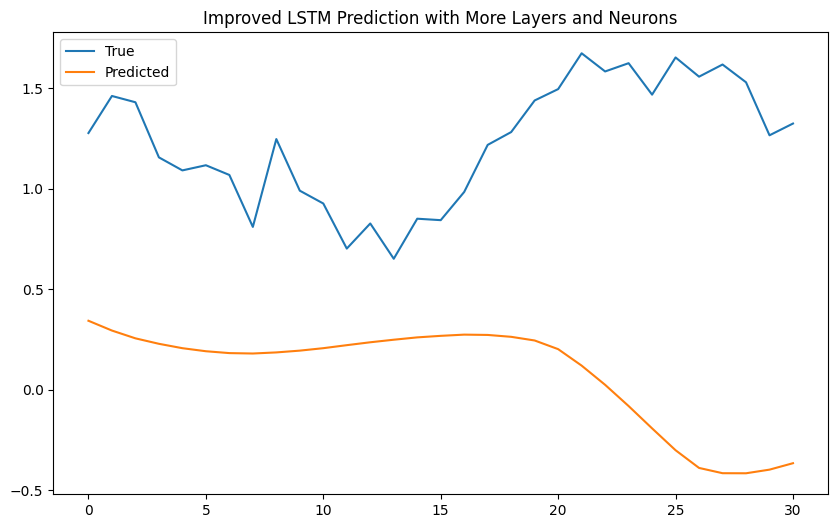

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Load your dataset
data = pd.read_csv('./DataSelected.csv')

# Define target variable and features
target = 'NVDA'
features = [col for col in data.columns if col != target]

X = data[features].values
y = data[target].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input for LSTM [samples, timesteps, features]
time_steps = 20  # Experimenting with a longer sequence length

def create_sequences(X, y, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

# Build LSTM model
model = Sequential([
    LSTM(256, activation='relu', return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])),
    Dropout(0.3),
    LSTM(128, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch > 30:
        return lr * 0.5  # Reduce learning rate after 30 epochs
    return lr

scheduler = LearningRateScheduler(lr_scheduler)

# Train the model
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=150,  # Increased epochs
    batch_size=32,
    verbose=1,
    callbacks=[scheduler]
)

# Evaluate the model
loss = model.evaluate(X_test_seq, y_test_seq)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test_seq)

# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Improved LSTM Prediction with More Layers and Neurons')
plt.show()
